# **Medical Leaf Classification**
This is notebook for medical leaf image classification. For "Tumbuhin" app.
<br>
This classification used TensorFlow-Lite Model Maker
<br>
<br>
for more detail about TFLite Model Maker, click link below:
<br>
https://www.tensorflow.org/lite/guide/model_maker
<br>
<br>
*NB: Please try this notebook on Google Colab*
<br>
<br>
### **1). Install TFLite Model Maker**
Run cell below to ensure your machine have installed tflite-model-maker library

In [1]:
!pip install tflite-model-maker

### **2). Import Required Libraries**
Import tflite-model-maker below for image processing preparation

In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

### **3). Locate the Datasets**
Here, you must locate the datasets location/directory.

In [3]:
image_path = "/content/drive/MyDrive/Datasets"

### **4). Load the Datasets**
Load datasets using DataLoader

In [4]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 1370, num_label: 23, labels: Alpinia_galanga, Amaranthus_viridis, Andrographis_paniculata, Artocarpus_heterophyllus, Azadirachta_indica, Basella_alba, Brassica_juncea, Carissa_carandas, Citrus_limon, Curcuma_zedoaria, Ficus_auriculata, Hibiscus_rosa-sinensis, Jasminum_sp, Mangifera_indica, Mentha_sp, Moringa_oleifera, Nyctanthes_arbor-tristis, Ocimum_tenuiflorum, Piper_betle, Plectranthus_amboinicus, Pongamia_pinnata, Psidium_guajava, Tinospora_cordifolia.


### **5). Distribute/split the Datasets**
Split the datasets into train-test-validation

Train 80% per class/labels

Test 10% per class/labels

Validation 10% per class/labels

In [5]:
train_data, rest_data = data.split(0.8) # 80% for training
validation_data, test_data = rest_data.split(0.5) # 10% for testing, 10% for validation

### **6). Display Random Images**
Display random images from datasets before continue

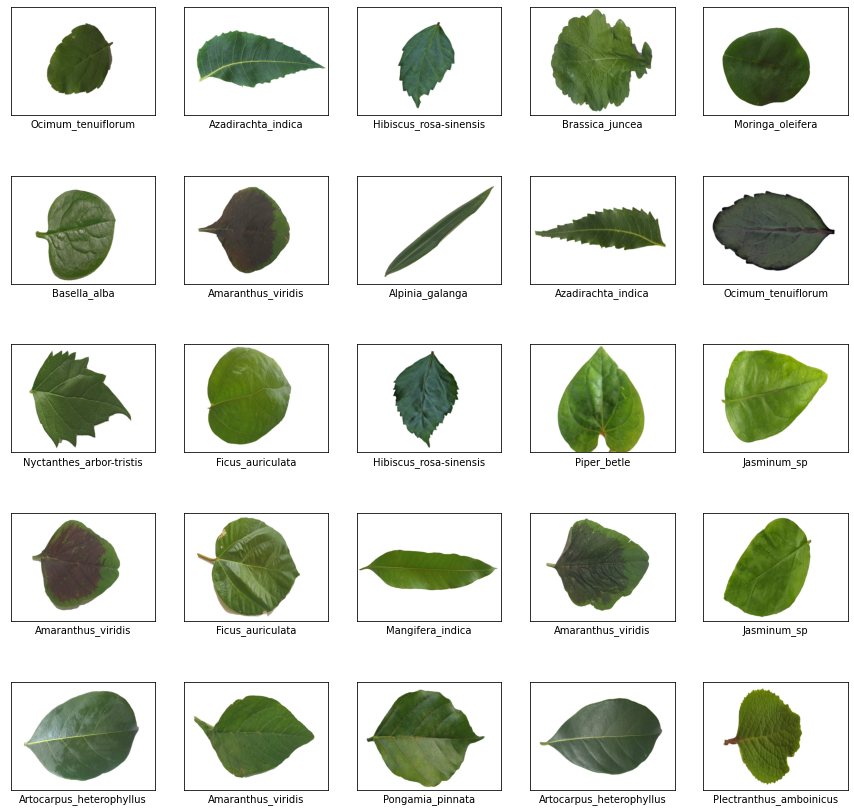

In [6]:
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(
    data.gen_dataset().unbatch().take(25)):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])

plt.show()

### **7). Use pre-trained model**
Here, we use EfficientNet Lite0 as a base model for image classification and build custom tflite model

More info, click here:
<br>
https://blog.tensorflow.org/2020/03/higher-accuracy-on-vision-models-with-efficientnet-lite.html

In [7]:
efficientnet_model = model_spec.get("efficientnet_lite1")

### **8). Training and Creating**
Here, we begin train the entire datasets and also create custom model based on pre-trained model

In [8]:
model = image_classifier.create(train_data,
                                epochs=10,
                                validation_data=validation_data,
                                model_spec=efficientnet_model)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 23)                29463     
Total params: 4,218,807
Trainable params: 29,463
Non-trainable params: 4,189,344
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
34/34 [==============================] - 151s 4s/step - loss: 2.6462 - accuracy: 0.2987 - val_loss: 1.8944 - val_accuracy: 0.7969
Epoch 2/10
34/34 [==============================] - 139s 4s/step - loss: 1.5725 - accuracy: 0.7978 - val_loss: 1.2968 - val_accuracy: 0.8984
Epoch 3/10
34/34 [==============================] - 142s 4s/step - loss: 1.2236 - accuracy: 0.8879 - val_loss: 1.0869 - val_accuracy: 0.9609
Epoch 4/10
34/34 [==============================] - 147s 4s/step - loss: 1.0766 - accuracy: 0.9246 - val_loss: 0.9814 - val_accuracy: 0.9688
Epoch 5/10
34/34 [==============================] - 134s 4s/step - loss: 1.0068 - accuracy: 0.9384 - val_loss: 0.9284 - val_accuracy: 0.9844
Epoch 6/10
34/34 [==============================] - 128s 4s/step - loss: 0.9572 - accuracy: 0.9559 - val_loss: 0.8858 - val_accuracy: 0.9844
Epoch 7/10
34/34 [==============================] - 148s 4s/step - loss: 0.9175 - accuracy: 0.9540 - val_loss: 0.8617 - val_accuracy: 0.9844
Epoch 8/10
34

### **9). Display Model Summary**

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 23)                29463     
Total params: 4,218,807
Trainable params: 29,463
Non-trainable params: 4,189,344
_________________________________________________________________


### **10). Evaluate the Model**
Evaluate the model using test data

In [10]:
model.evaluate(test_data)

5/5 [==============================] - 24s 3s/step - loss: 0.8317 - accuracy: 0.9854


[0.8316925764083862, 0.985401451587677]

### **11). Display Random Predicted Images**
Display info about predicted image, we can see if the image was predicted correctly or not

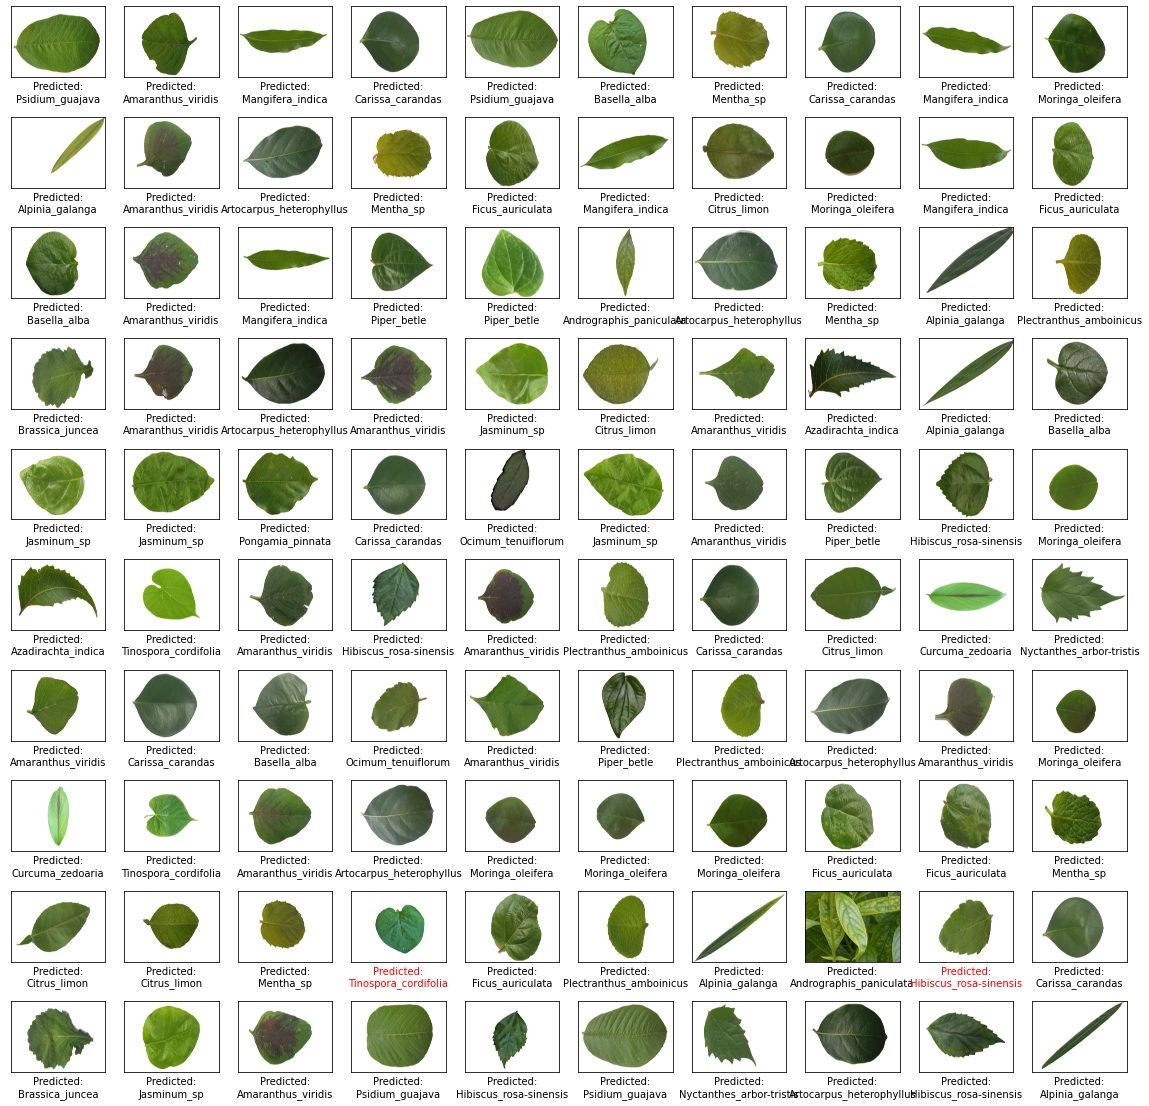

In [11]:
def get_label_color(predict_label, actual_label):
  if predict_label == actual_label:
    return "black"
  else:
    return "red"

plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(
    test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel("Predicted:\n{}".format(predict_label))

plt.show()

### **12). Deployment**
Export/deploy into TFLite Model File. Use for Android "Tumbuhin" app

In [12]:
model.export(export_dir=".")

INFO:tensorflow:Assets written to: /tmp/tmpj3fcp2e9/assets


INFO:tensorflow:Assets written to: /tmp/tmpj3fcp2e9/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp6_ya2mrj/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp6_ya2mrj/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


For exporting labels only

In [13]:
model.export(export_dir=".", export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


### **13). Evaluate The TFLite Model**
Evaluate the TFLite Model with test data (again)

In [14]:
model.evaluate_tflite("model.tflite", test_data)

{'accuracy': 0.9927007299270073}

In [ ]:
model.export(export_dir=".")